In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import yaml

In [16]:
%run ./src/database.py
%run ./src/util.py
%run ./src/data_preprocessing.py
%run ./src/feature_engineering.py
%run ./src/visualisation.py

In [3]:
YAML_FILEPATHNAME = "./config.yaml"
PRE_CRUISE_DB = 0
POST_CRUISE_DB = 1

In [4]:
# Read YAML file
yaml_data = read_yaml(YAML_FILEPATHNAME)

# Preprocessing

In [5]:
DATA_PATH = yaml_data['data_path']
TEST_SIZE = yaml_data['test_size']
RANDOM_STATE = yaml_data['random_state']
TARGET_VARIABLE = yaml_data['target_variable']

In [6]:
# Read source data (Pre_cruise, Post_cruise) with removal of duplicates
ds_pre_cruise = Database(DATA_PATH)
df_pre_cruise = ds_pre_cruise.db_read(yaml_data['databases'][PRE_CRUISE_DB])

ds_post_cruise = Database(DATA_PATH)
df_post_cruise = ds_post_cruise.db_read(yaml_data['databases'][POST_CRUISE_DB])

In [7]:
# Merge Pre_cruise and Post_cruise to form df_cruise with Index as the key
df_cruise = merge_dataframe (df_pre_cruise, df_post_cruise)

In [9]:
# Split composite field to increase interpretability
split_column(df_cruise, 'Source of Traffic', ['Source', 'Traffic'], ' - ')

split_column(df_cruise, 'Cruise Distance', ['Distance', 'Dist_Metrics'], ' ')
df_cruise['Distance'] = pd.to_numeric(df_cruise['Distance'], errors='coerce').astype('float')

In [8]:
# Remove IDs columns as in general they will have no predictive power
remove_col(df_cruise,['Ext_Intcode_x', 'Ext_Intcode_y'])

In [10]:
# Split composite field to increase interpretability
convert_object_to_datetime (df_cruise, ['Date of Birth'],['%d/%m/%Y'])
convert_object_to_datetime (df_cruise, ['Logging'],['%d/%m/%Y %H:%M'])

In [11]:
# Removal of rows from Continuous variable which has missing value 
remove_missing_value(df_cruise,['Date of Birth', TARGET_VARIABLE, 'Distance','Logging'])

In [18]:
dp_replace_value(df_cruise, ["Gender"], 'F', 'Female', True)
dp_replace_value(df_cruise, ["Gender"], 'm', 'Male', True)

In [19]:
numeric_ordinal_list =['Embarkation/Disembarkation time convenient', 'Ease of Online booking', 'Gate location', 
    'Online Check-in', 'Cabin Comfort', 'Cabin service', 'Baggage handling', 'Port Check-in Service', 
    'Onboard Service', 'Cleanliness']
dp_replace_value(df_cruise, numeric_ordinal_list, 0, None)


In [20]:
dp_replace_value(df_cruise, ["Cruise Name"], 'L', 'Lapras', True)
dp_replace_value(df_cruise, ["Cruise Name"], 'b', 'Blastoise', True)

In [21]:
categorical_ordinal_list  = ['Onboard Wifi Service', 'Onboard Dining Service','Onboard Entertainment']
dp_restrict_val(df_cruise, numeric_ordinal_list, [1, 2, 3, 4, 5])

dp_restrict_val(df_cruise, ["Gender"], ['Female','Male'])
dp_restrict_val(df_cruise, categorical_ordinal_list, ['Not at all important', 'A little important', 
                                                                       'Somewhat important', 'Very important', 
                                                                       'Extremely important'])
dp_restrict_val(df_cruise, ["Cruise Name"], ['Lapras','Blastoise'])
dp_restrict_val(df_cruise, ["Ticket Type"], ['Deluxe','Luxury', 'Standard'])
dp_restrict_val(df_cruise, ["Source"], ['Indirect','Direct'])
dp_restrict_val(df_cruise, ["Dining"], [0.0, 0.1])
dp_restrict_val(df_cruise, ["Traffic"], ['Search Engine','Company Website','Email Marketing','Social Media'])
dp_restrict_val(df_cruise, ["Dist_Metrics"], ['KM','Miles'])

In [22]:
# Label encode non-numeric categorical columns to get numeric values
list_non_numeric_col = ['Gender','Onboard Wifi Service','Onboard Dining Service','Onboard Entertainment','Cruise Name',
                            'Ticket Type','Source','Traffic','Dist_Metrics']
label_encoder(df_cruise,list_non_numeric_col)

In [23]:
# Derive year from date column to enhance model efficiency, mitigate noise
convert_datetime_to_year(df_cruise, ['Date of Birth','Logging'],['Year of Birth','Year of Logging'])

# Feature Engineering

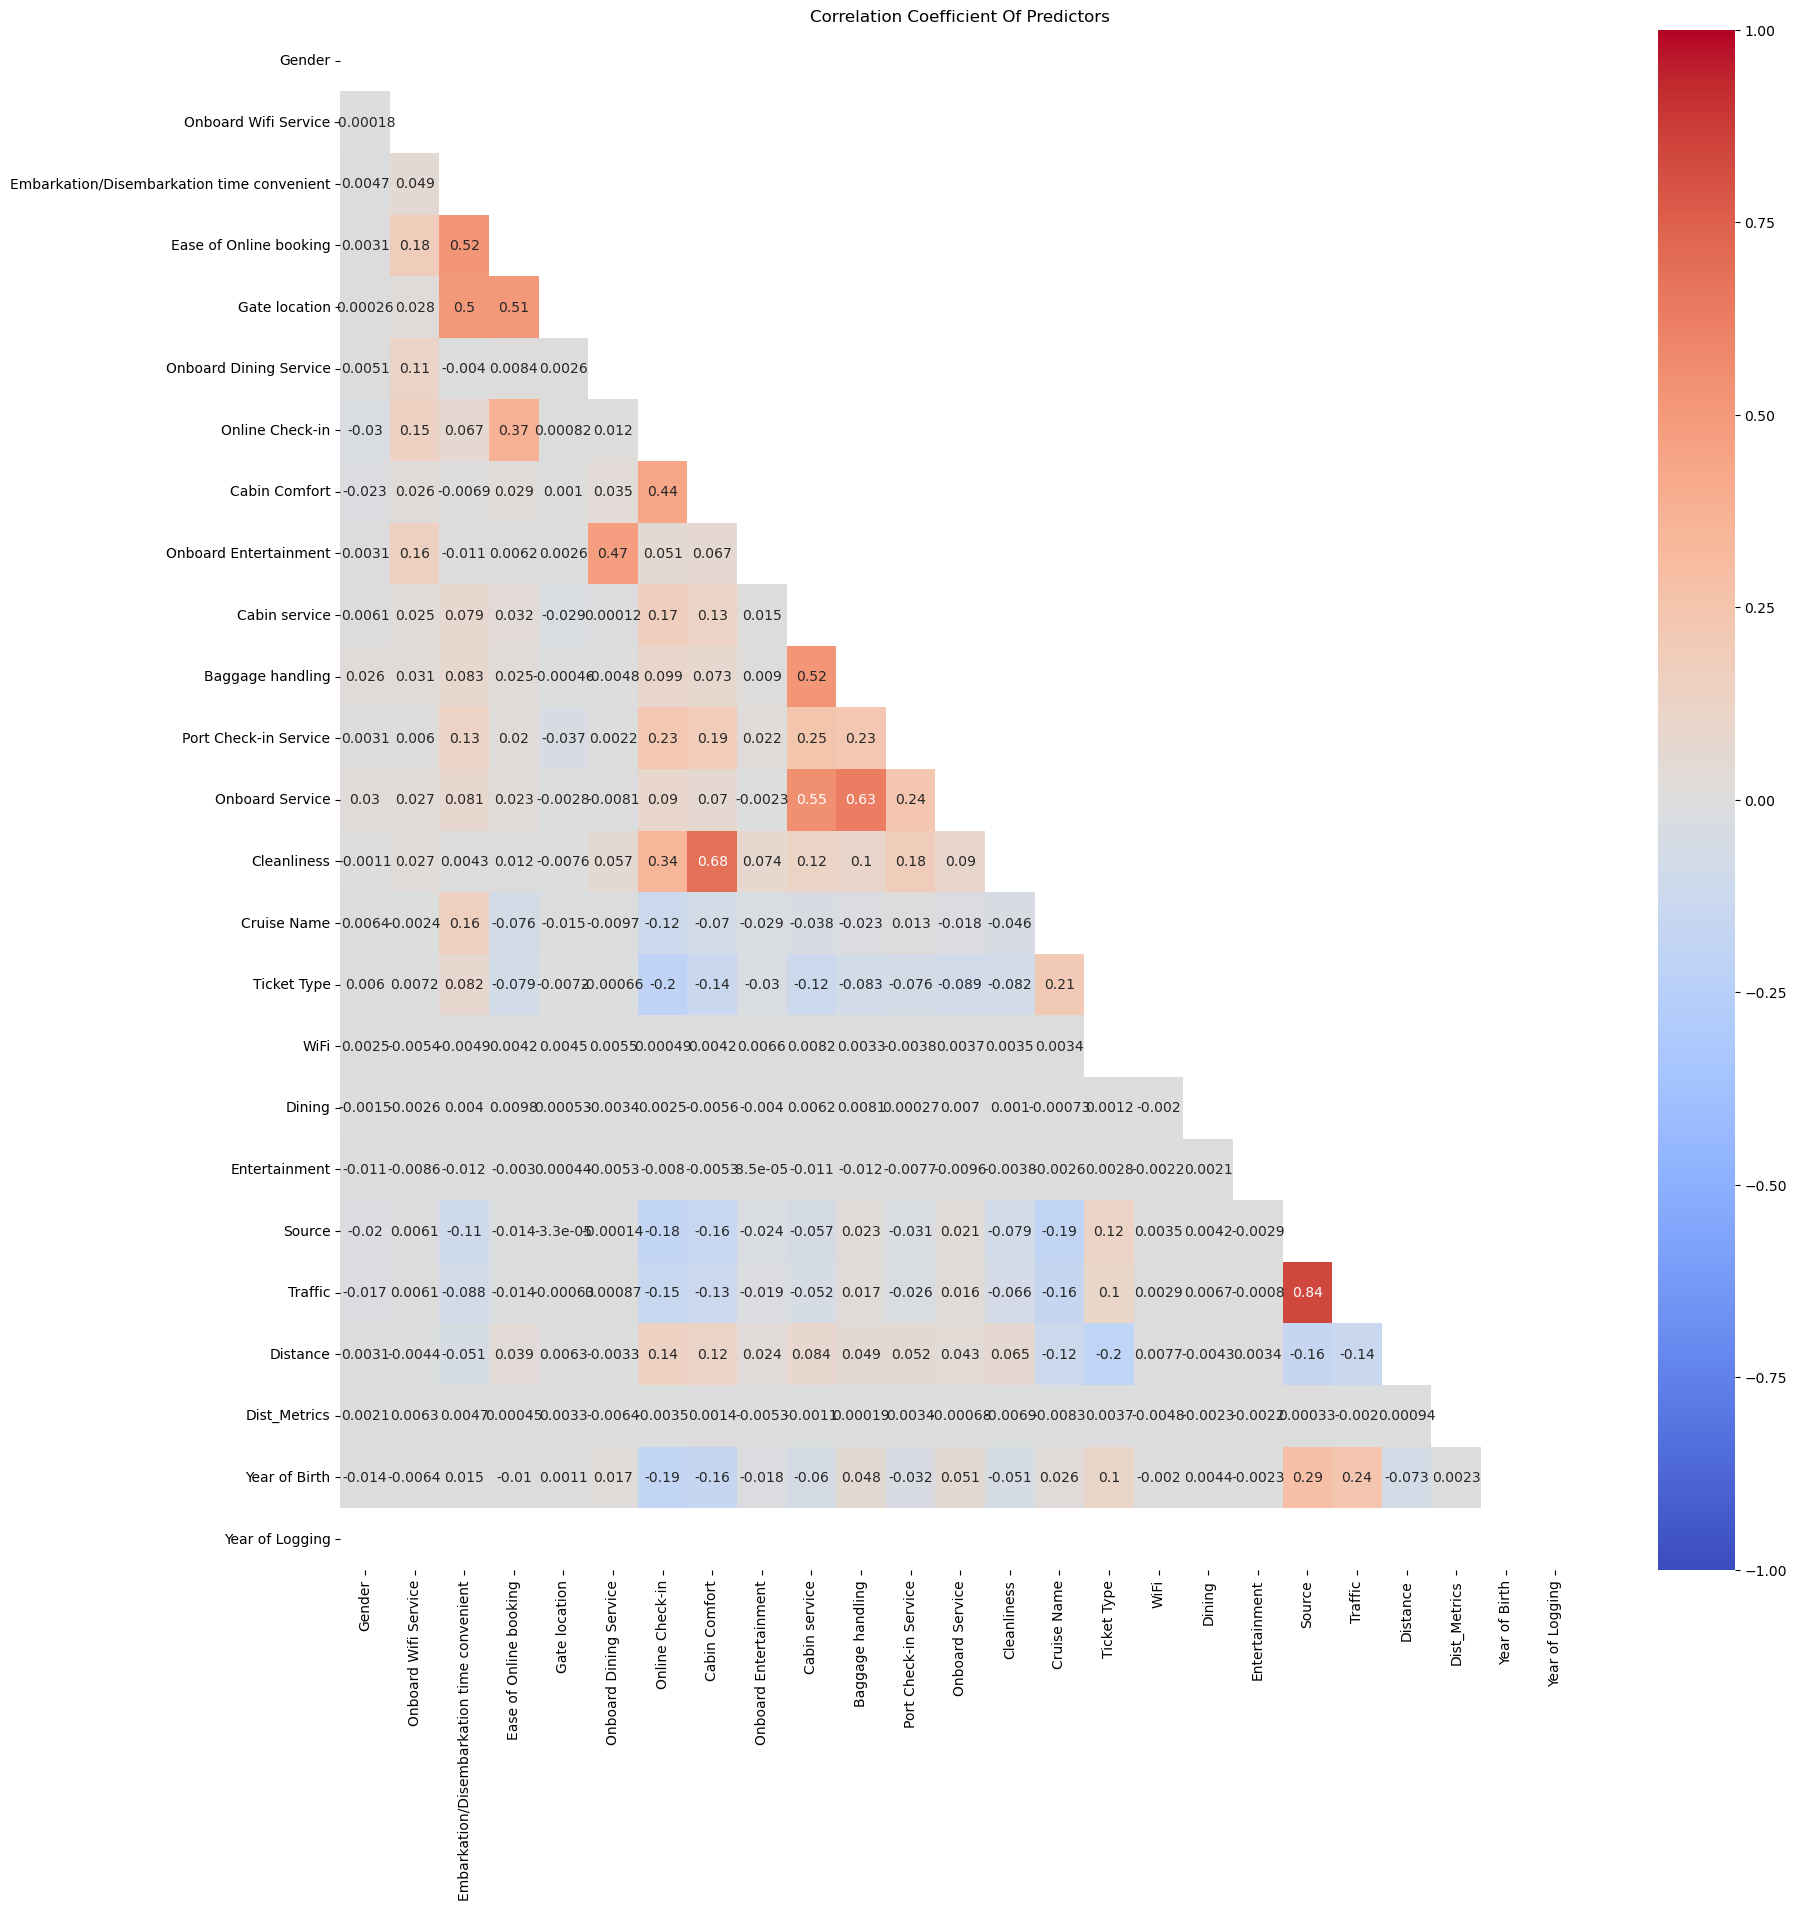

In [24]:
plot_corr_chart(df_cruise)

In [25]:
df_cruise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84459 entries, 2 to 133745
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Gender                                      84459 non-null  int32  
 1   Onboard Wifi Service                        84459 non-null  int32  
 2   Embarkation/Disembarkation time convenient  70861 non-null  float64
 3   Ease of Online booking                      69648 non-null  float64
 4   Gate location                               73566 non-null  float64
 5   Onboard Dining Service                      84459 non-null  int32  
 6   Online Check-in                             72783 non-null  float64
 7   Cabin Comfort                               71643 non-null  float64
 8   Onboard Entertainment                       84459 non-null  int32  
 9   Cabin service                               75729 non-null  float64
 10  Baggage handli

In [63]:
# Standardise distance by converting Mile to KM
convert_miles_to_KM(df_cruise, "Distance")
df_cruise["Distance"] = abs(df_cruise["Distance"])

In [64]:
# Derive Age from Year of Birth and Year of Logging
# calc_year_diff(df_cruise, 'Year of Logging', 'Year of Birth', 'Age')

In [65]:
# %run ./src/feature_engineering.py
# #### Denote Missing column
# denote_missing_col(df_cruise)

#### Gender

In [66]:
# vs_countplot_both(df_cruise, 'Gender')

In [67]:
# impute_missing_value(df_cruise,  impute_type="random", col_list=['Gender'], none_val=2)

In [68]:
# vs_countplot_both(df_cruise, 'Gender')

#### Embarkation/Disembarkation time convenient

In [69]:
# vs_countplot_both(df_cruise, 'Embarkation/Disembarkation time convenient')

In [70]:
df_cruise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84459 entries, 2 to 133745
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Gender                                      84459 non-null  int32  
 1   Onboard Wifi Service                        84459 non-null  int32  
 2   Embarkation/Disembarkation time convenient  84459 non-null  float64
 3   Ease of Online booking                      84459 non-null  float64
 4   Gate location                               84459 non-null  float64
 5   Onboard Dining Service                      84459 non-null  int32  
 6   Online Check-in                             84459 non-null  float64
 7   Cabin Comfort                               84459 non-null  float64
 8   Onboard Entertainment                       84459 non-null  int32  
 9   Cabin service                               84459 non-null  float64
 10  Baggage handli

In [71]:
impute_missing_value(df_cruise, impute_type="mean")

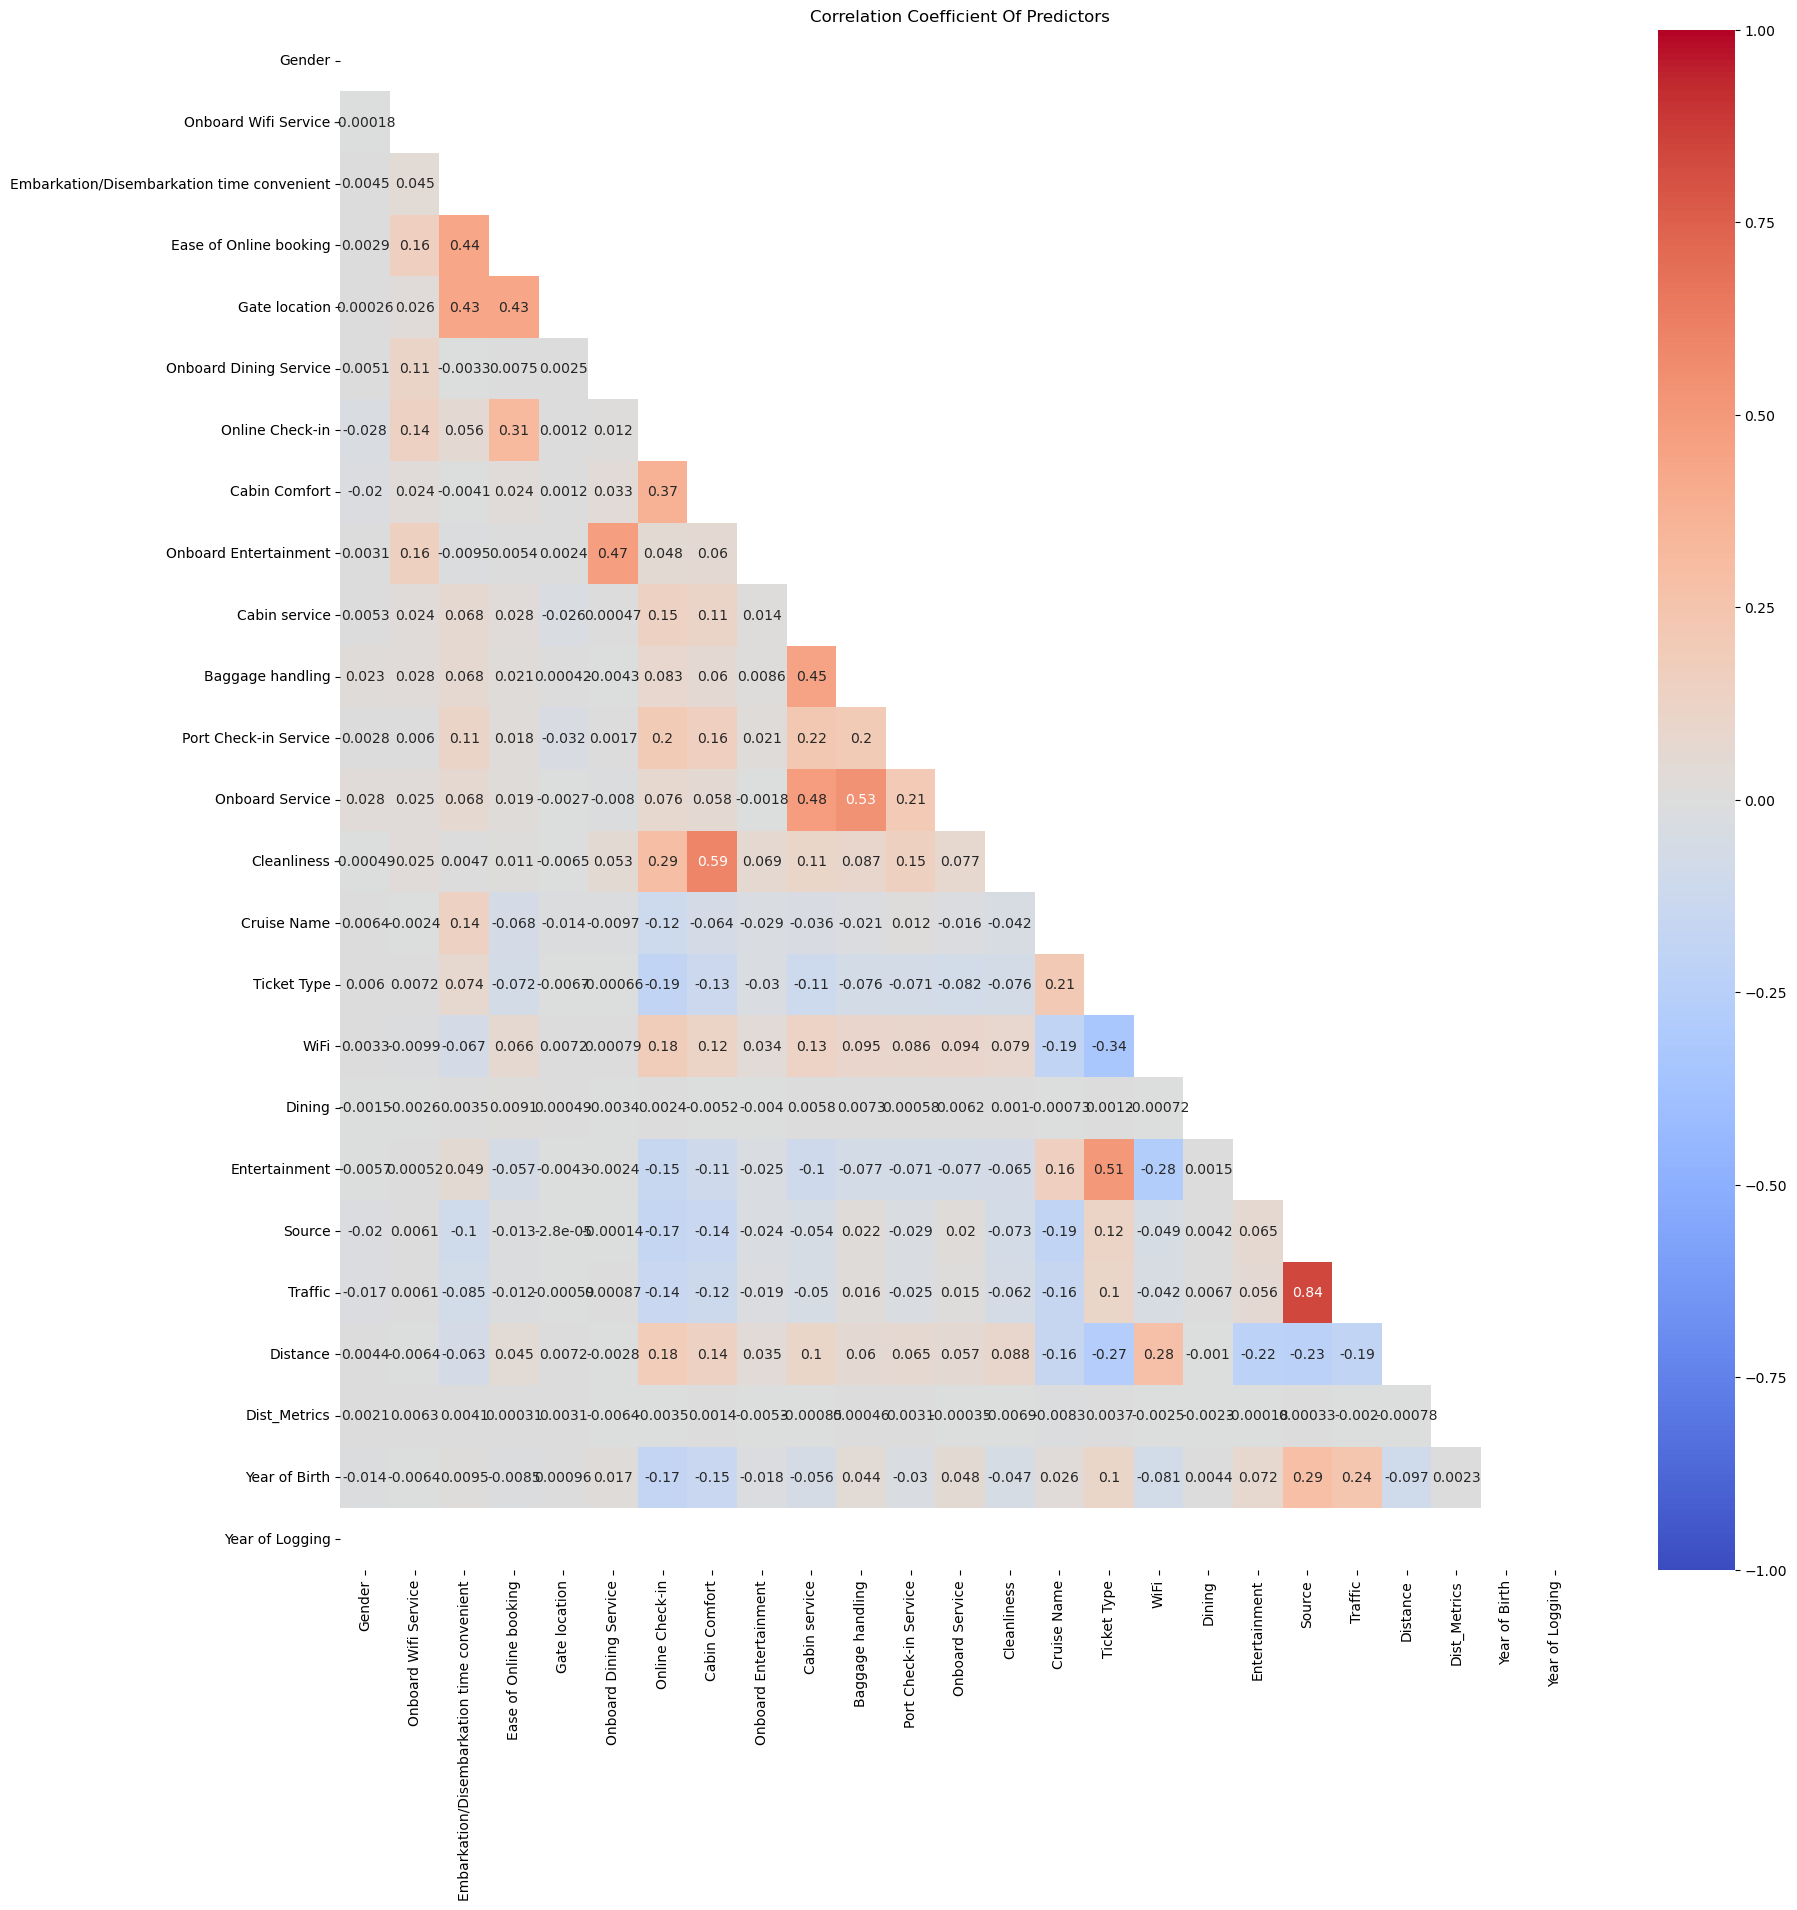

In [72]:
plot_corr_chart(df_cruise)

# Model Building

In [73]:
df_cruise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84459 entries, 2 to 133745
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Gender                                      84459 non-null  int32  
 1   Onboard Wifi Service                        84459 non-null  int32  
 2   Embarkation/Disembarkation time convenient  84459 non-null  float64
 3   Ease of Online booking                      84459 non-null  float64
 4   Gate location                               84459 non-null  float64
 5   Onboard Dining Service                      84459 non-null  int32  
 6   Online Check-in                             84459 non-null  float64
 7   Cabin Comfort                               84459 non-null  float64
 8   Onboard Entertainment                       84459 non-null  int32  
 9   Cabin service                               84459 non-null  float64
 10  Baggage handli

In [74]:
X = df_cruise.drop([TARGET_VARIABLE],axis=1)
y = df_cruise[TARGET_VARIABLE]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE , random_state=RANDOM_STATE)

In [75]:
# from imblearn.over_sampling import SMOTE


# os = SMOTE(random_state=RANDOM_STATE)
# columns = X.columns
# X_train, y_train = os.fit_resample(X_train, y_train)

In [76]:
df_cruise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84459 entries, 2 to 133745
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Gender                                      84459 non-null  int32  
 1   Onboard Wifi Service                        84459 non-null  int32  
 2   Embarkation/Disembarkation time convenient  84459 non-null  float64
 3   Ease of Online booking                      84459 non-null  float64
 4   Gate location                               84459 non-null  float64
 5   Onboard Dining Service                      84459 non-null  int32  
 6   Online Check-in                             84459 non-null  float64
 7   Cabin Comfort                               84459 non-null  float64
 8   Onboard Entertainment                       84459 non-null  int32  
 9   Cabin service                               84459 non-null  float64
 10  Baggage handli

In [77]:
log_regression = LogisticRegression(random_state=RANDOM_STATE, max_iter=5000)
log_regression.fit(X_train, y_train)
y_train_pred_log = log_regression.predict(X_train)
y_test_pred_log = log_regression.predict(X_test)

In [78]:
# random_forest = RandomForestClassifier()
# random_forest.fit(X_train, y_train)
# y_train_pred_rf = random_forest.predict(X_train)
# y_test_pred_rf = random_forest.predict(X_test)

# Model Evaluation

In [79]:
from sklearn import metrics
print("Classification report - Train")
print(classification_report(y_train, y_train_pred_log))
print(classification_report(y_test, y_test_pred_log))
print(" ")
print("Classification report - Test")
print(confusion_matrix(y_train, y_train_pred_log))
print("Confusion Matrix - Test")
print(confusion_matrix(y_test, y_test_pred_log))
print(" ")
print("Train Accuracy: ",format(metrics.accuracy_score(y_train, y_train_pred_log), '.4f'))
# print("Train Precision: ",format(metrics.precision_score(y_train, y_train_pred_log, average='micro'), '.4f'))
# print("Train Recall:",format(metrics.recall_score(y_train, y_train_pred_log,average='micro'), '.4f'))
# print(" ")
print("Test Accuracy:",format(metrics.accuracy_score(y_test, y_test_pred_log), '.4f'))
# print("Test Precision:",format(metrics.precision_score(y_test, y_test_pred_log,average='micro'), '.4f'))
# print("Test Recall:",format(metrics.recall_score(y_test, y_test_pred_log,average='micro'), '.4f'))

print("")


Classification report - Train
              precision    recall  f1-score   support

           0       0.62      0.23      0.34      4977
           1       0.92      0.86      0.89     32205
           2       0.82      0.97      0.89     30385

    accuracy                           0.86     67567
   macro avg       0.79      0.69      0.71     67567
weighted avg       0.85      0.86      0.85     67567

              precision    recall  f1-score   support

           0       0.59      0.23      0.33      1227
           1       0.92      0.86      0.89      8137
           2       0.82      0.97      0.89      7528

    accuracy                           0.86     16892
   macro avg       0.78      0.68      0.70     16892
weighted avg       0.85      0.86      0.85     16892

 
Classification report - Test
[[ 1160  1465  2352]
 [  701 27619  3885]
 [    0  1025 29360]]
Confusion Matrix - Test
[[ 279  331  617]
 [ 190 6987  960]
 [   0  256 7272]]
 
Train Accuracy:  0.8605
Test Acc

In [80]:
df_cruise["Distance"]

index
2          7828.280826
3          1878.250755
4          7680.703981
6          4071.779316
10         3984.574817
              ...     
133731     6278.723953
133734    12745.272982
133739    18225.740365
133743    13060.550788
133745      536.643073
Name: Distance, Length: 84459, dtype: float64